<a href="https://colab.research.google.com/github/Vasanth12414/Deep-Learning-Models/blob/main/Object_Detection_Using_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import xml.etree.ElementTree as et
from glob import glob
import pandas as pd


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/Pets_Object_Detection'
TRAIN_PATH = '/content/drive/MyDrive/Colab Notebooks/Pets_Object_Detection/dataset/train'
TEST_PATH = '/content/drive/MyDrive/Colab Notebooks/Pets_Object_Detection/dataset/test'
YAML_PATH = '/content/drive/MyDrive/Colab Notebooks/Pets_Object_Detection/data.yaml'

In [3]:
def extract_object_info(filename):
    tree = et.parse(filename)
    root = tree.getroot()

    # Initialize a new list for each file
    xml_data = []

    # 1. Extracting Image title
    image_title = root.find('filename').text

    # 2. Extracting Image size
    width, height = int(root.find('size').find('width').text), int(root.find('size').find('height').text)

    # 3. Extracting Bounding Box Parameters
    objects = root.findall('object')
    for o in objects:
        name = o.find('name').text
        xmin = int(o.find('bndbox').find('xmin').text)
        xmax = int(o.find('bndbox').find('xmax').text)
        ymin = int(o.find('bndbox').find('ymin').text)
        ymax = int(o.find('bndbox').find('ymax').text)
        xml_data.append([image_title, width, height, name, xmin, xmax, ymin, ymax])

    return xml_data

In [4]:
#loading XML files from training and testing set
train_xml_list = glob(os.path.join(TRAIN_PATH, '*.xml'))
test_xml_list = glob(os.path.join(TEST_PATH, '*.xml'))

In [5]:
train_xml_list[:3]

['/content/drive/MyDrive/Colab Notebooks/Pets_Object_Detection/dataset/train/pug_156_jpg.rf.5503b46fad3a17c0aee6ecf18e179157.xml',
 '/content/drive/MyDrive/Colab Notebooks/Pets_Object_Detection/dataset/train/pug_161_jpg.rf.7757273ac2d07fbacc2a4731c25eb375.xml',
 '/content/drive/MyDrive/Colab Notebooks/Pets_Object_Detection/dataset/train/pug_151_jpg.rf.72a596f6ee43005cd5536b57a0193159.xml']

In [6]:
test_xml_list[:3]

['/content/drive/MyDrive/Colab Notebooks/Pets_Object_Detection/dataset/test/Abyssinian_127_jpg.rf.4425d22917ead085ad038931b4806c8f.xml',
 '/content/drive/MyDrive/Colab Notebooks/Pets_Object_Detection/dataset/test/Abyssinian_131_jpg.rf.e8acfb60e4d01529586b9d81930b35a2.xml',
 '/content/drive/MyDrive/Colab Notebooks/Pets_Object_Detection/dataset/test/Abyssinian_149_jpg.rf.84b8351968b42b38478e0b6c35d58d07.xml']

In [7]:
#prcessing the data with the help of function
train_data = []
test_data = []

for train_list in map(extract_object_info, train_xml_list):
    train_data.extend(train_list)

for test_list in map(extract_object_info, test_xml_list):
    test_data.extend(test_list)

In [8]:
#displaying parse data
train_data[:3]

[['pug_156_jpg.rf.5503b46fad3a17c0aee6ecf18e179157.jpg',
  300,
  225,
  'dog',
  73,
  215,
  17,
  132],
 ['pug_161_jpg.rf.7757273ac2d07fbacc2a4731c25eb375.jpg',
  300,
  281,
  'dog',
  65,
  199,
  36,
  166],
 ['pug_151_jpg.rf.72a596f6ee43005cd5536b57a0193159.jpg',
  198,
  300,
  'dog',
  2,
  193,
  29,
  173]]

In [9]:
test_data[:3]

[['Abyssinian_127_jpg.rf.4425d22917ead085ad038931b4806c8f.jpg',
  266,
  400,
  'cat',
  96,
  179,
  246,
  328],
 ['Abyssinian_131_jpg.rf.e8acfb60e4d01529586b9d81930b35a2.jpg',
  311,
  320,
  'cat',
  17,
  206,
  25,
  180],
 ['Abyssinian_149_jpg.rf.84b8351968b42b38478e0b6c35d58d07.jpg',
  500,
  375,
  'cat',
  155,
  347,
  39,
  251]]

In [10]:
#converting this data to dataframe format
train_df = pd.DataFrame(train_data, columns = ['filename', 'width', 'height', 'name', 'xmin', 'xmax', 'ymin', 'ymax'])
test_df = pd.DataFrame(test_data, columns = ['filename', 'width', 'height', 'name', 'xmin', 'xmax', 'ymin', 'ymax'])

In [11]:
train_df.shape

(2527, 8)

In [12]:
train_df.head(3)

,filename,width,height,name,xmin,xmax,ymin,ymax
0,pug_156_jpg.rf.5503b46fad3a17c0aee6ecf18e17915...,300,225,dog,73,215,17,132
1,pug_161_jpg.rf.7757273ac2d07fbacc2a4731c25eb37...,300,281,dog,65,199,36,166
2,pug_151_jpg.rf.72a596f6ee43005cd5536b57a019315...,198,300,dog,2,193,29,173


In [13]:
train_df['name'].unique()

array(['dog', 'cat'], dtype=object)

In [14]:
len(train_df['filename'].unique())

2523

In [15]:
train_df['name'].value_counts()

,count
name,
dog,1731
cat,796


In [16]:
test_df.shape

(358, 8)

In [18]:
test_df.head(3)

,filename,width,height,name,xmin,xmax,ymin,ymax
0,Abyssinian_127_jpg.rf.4425d22917ead085ad038931...,266,400,cat,96,179,246,328
1,Abyssinian_131_jpg.rf.e8acfb60e4d01529586b9d81...,311,320,cat,17,206,25,180
2,Abyssinian_149_jpg.rf.84b8351968b42b38478e0b6c...,500,375,cat,155,347,39,251


In [19]:
len(test_df['filename'].unique())

358

In [20]:
train_df['name'].unique()

array(['dog', 'cat'], dtype=object)

In [21]:
for df in [train_df, test_df]:
  df['center_x'] = ((df['xmin'] + df['xmax'])/2)/df['width']
  df['center_y'] = ((df['ymin'] + df['ymax'])/2)/df['height']
  df['w'] = (df['xmax'] - df['xmin'])/df['width']
  df['h'] = (df['ymax'] - df['ymin'])/df['height']
  #adding numeric labels
  labels = {'cat' : 0, 'dog' : 1}
  df['id'] = df['name'].map(labels)

In [22]:
train_df.head(3)

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h,id
0,pug_156_jpg.rf.5503b46fad3a17c0aee6ecf18e17915...,300,225,dog,73,215,17,132,0.480000,0.331111,0.473333,0.511111,1
1,pug_161_jpg.rf.7757273ac2d07fbacc2a4731c25eb37...,300,281,dog,65,199,36,166,0.440000,0.359431,0.446667,0.462633,1
2,pug_151_jpg.rf.72a596f6ee43005cd5536b57a019315...,198,300,dog,2,193,29,173,0.492424,0.336667,0.964646,0.480000,1


In [23]:
test_df.head(3)

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h,id
0,Abyssinian_127_jpg.rf.4425d22917ead085ad038931...,266,400,cat,96,179,246,328,0.516917,0.717500,0.312030,0.205000,0
1,Abyssinian_131_jpg.rf.e8acfb60e4d01529586b9d81...,311,320,cat,17,206,25,180,0.358521,0.320312,0.607717,0.484375,0
2,Abyssinian_149_jpg.rf.84b8351968b42b38478e0b6c...,500,375,cat,155,347,39,251,0.502000,0.386667,0.384000,0.565333,0


In [24]:
def save_labels(df, folder_path):
  for filename, group in df.groupby('filename'):
    txt_filename = os.path.join(folder_path, os.path.splitext(filename)[0] + '.txt')
    group[['id', 'center_x', 'center_y', 'w', 'h']].to_csv(txt_filename, sep = ' ', index = False, header = False)

# save_labels(train_df, TRAIN_PATH)
# save_labels(test_df, TEST_PATH)

In [25]:
save_labels(train_df, TRAIN_PATH)
save_labels(test_df, TEST_PATH)

In [26]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.1/949.1 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [27]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Pets_Object_Detection')

In [28]:
ls

 dataset/   data.yaml  'Object Detection Using YOLOv8.ipynb'


In [29]:
from ultralytics import YOLO

#loading the yolov8 model
model = YOLO('yolov8s.yaml')

#train the model
model.train(data = 'data.yaml', epochs = 20, batch = 8, name = 'Model')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.90 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=Model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False,

100%|██████████| 755k/755k [00:00<00:00, 23.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 91.4MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Colab Notebooks/Pets_Object_Detection/dataset/train... 2523 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2523/2523 [01:44<00:00, 24.05it/s] 


train: New cache created: /content/drive/MyDrive/Colab Notebooks/Pets_Object_Detection/dataset/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Colab Notebooks/Pets_Object_Detection/dataset/test... 358 images, 0 backgrounds, 0 corrupt: 100%|██████████| 358/358 [00:15<00:00, 23.59it/s] 


val: New cache created: /content/drive/MyDrive/Colab Notebooks/Pets_Object_Detection/dataset/test.cache
Plotting labels to runs/detect/Model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/Model
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.06G      2.784      3.973      3.751          7        640: 100%|██████████| 316/316 [01:12<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.09it/s]

                   all        358        358     0.0431     0.0636     0.0318    0.00907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.04G      2.391      3.087      2.963          5        640: 100%|██████████| 316/316 [01:08<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.69it/s]

                   all        358        358      0.295      0.271      0.204     0.0742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.07G      2.131      2.666      2.716          7        640: 100%|██████████| 316/316 [01:07<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.49it/s]


                   all        358        358      0.357      0.428      0.316      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.11G      1.905      2.312      2.482          6        640: 100%|██████████| 316/316 [01:06<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.60it/s]

                   all        358        358       0.49      0.531       0.46      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.14G      1.767      2.141      2.333          5        640: 100%|██████████| 316/316 [01:06<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.11it/s]

                   all        358        358      0.535      0.585      0.529      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.19G      1.628      1.938      2.204          5        640: 100%|██████████| 316/316 [01:06<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.98it/s]

                   all        358        358      0.642      0.612      0.671      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.22G      1.554      1.814      2.131          8        640: 100%|██████████| 316/316 [01:07<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.72it/s]

                   all        358        358      0.643      0.688       0.71       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.26G      1.481      1.701      2.038          8        640: 100%|██████████| 316/316 [01:06<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  5.78it/s]

                   all        358        358      0.692      0.712       0.75      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.29G      1.422      1.612      1.979          8        640: 100%|██████████| 316/316 [01:06<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  5.87it/s]

                   all        358        358      0.763      0.686      0.777       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.33G      1.379       1.54      1.958         10        640: 100%|██████████| 316/316 [01:06<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.58it/s]

                   all        358        358      0.824      0.739      0.843      0.576


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.36G      1.184      1.184      1.782          3        640: 100%|██████████| 316/316 [01:05<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.60it/s]

                   all        358        358      0.789      0.761      0.833      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       3.4G      1.115      1.054       1.71          3        640: 100%|██████████| 316/316 [01:04<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  5.85it/s]

                   all        358        358      0.795      0.821      0.893      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.43G      1.071     0.9678      1.658          3        640: 100%|██████████| 316/316 [01:04<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.75it/s]

                   all        358        358      0.839      0.814      0.887       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.47G       1.03     0.9369       1.62          3        640: 100%|██████████| 316/316 [01:03<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.00it/s]

                   all        358        358      0.849      0.829      0.886      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       3.5G     0.9972     0.8735      1.569          3        640: 100%|██████████| 316/316 [01:04<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  5.92it/s]

                   all        358        358      0.885      0.836      0.921      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.55G     0.9497     0.8214      1.533          3        640: 100%|██████████| 316/316 [01:04<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  5.95it/s]

                   all        358        358      0.869      0.874      0.927      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.58G     0.9274     0.7974      1.514          3        640: 100%|██████████| 316/316 [01:05<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.69it/s]

                   all        358        358      0.893      0.862      0.941      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.62G     0.8814      0.739      1.468          3        640: 100%|██████████| 316/316 [01:04<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.35it/s]

                   all        358        358      0.925      0.877      0.939      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.65G      0.863     0.7142      1.449          3        640: 100%|██████████| 316/316 [01:04<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.95it/s]

                   all        358        358      0.947      0.857      0.951      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.69G     0.8388     0.6775      1.416          3        640: 100%|██████████| 316/316 [01:03<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.15it/s]

                   all        358        358      0.933      0.888      0.959      0.769



20 epochs completed in 0.396 hours.
Optimizer stripped from runs/detect/Model/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/Model/weights/best.pt, 22.5MB

Validating runs/detect/Model/weights/best.pt...
Ultralytics 8.3.90 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.89it/s]


                   all        358        358      0.933      0.888      0.959      0.769
                   cat        122        122      0.917      0.907      0.951      0.827
                   dog        236        236      0.949      0.868      0.967      0.711
Speed: 0.2ms preprocess, 3.7ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/Model


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x796c3c41bad0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [30]:
model = YOLO('/content/drive/MyDrive/Colab Notebooks/Pets_Object_Detection/runs/detect/Model/weights/best.pt')


In [31]:
import cv2

In [44]:
# IMG_PATH = '/content/drive/MyDrive/Colab Notebooks/Pets_Object_Detection/cat_dog.jpg'
IMG_PATH = '/content/drive/MyDrive/Colab Notebooks/Pets_Object_Detection/cat_dog.png'
image = cv2.imread(IMG_PATH)
results = model.predict(source = IMG_PATH)


image 1/1 /content/drive/MyDrive/Colab Notebooks/Pets_Object_Detection/cat_dog.png: 640x480 1 cat, 1 dog, 72.9ms
Speed: 6.5ms preprocess, 72.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)


In [45]:
def draw_bounding_box_with_label(image,label,bbox,color = (255,0,0) , font = cv2.FONT_HERSHEY_SIMPLEX):
  xmin , xmax , ymin , ymax = bbox
  cv2.rectangle(image ,(xmin ,ymin),(xmax , ymax), color,2)

  font_scale = 0.8
  font_thickness = 1
  text_size, _ = cv2.getTextSize(label, font, font_scale, font_thickness)
  # text_width, text_height = text_size
  text_x = xmin
  test_y = max(ymin - 5 , text_size[1] + 5) # assigned to test_y here
  cv2.rectangle(image,(text_x , test_y - text_size[1] - 5), # changed to test_y
                 (text_x + text_size[0] , test_y + 5) , color, -1) # changed to test_y

  cv2.putText(image,label,(text_x , test_y),font,font_scale,(0,0,0),font_thickness , lineType = cv2.LINE_AA)
  font_thickness = 1
  text_size, _ = cv2.getTextSize(label, font, font_scale, font_thickness)
  # text_width, text_height = text_size
  text_x = xmin
  test_y = max(ymin - 5 , text_size[1] + 5)
  cv2.rectangle(image,(text_x , test_y - text_size[1] - 5),
                 (text_x + text_size[0] , test_y + 5) , color, -1)

  cv2.putText(image,label,(text_x , test_y),font,font_scale,(0,0,0),font_thickness , lineType = cv2.LINE_AA)

In [46]:
for result in results:
    for box in result.boxes:
        xmin, ymin, xmax, ymax = map(int, box.xyxy[0])

        label = result.names[int(box.cls)]  # Extract label
        confidence = box.conf[0]  # Extract confidence score

        # Label with confidence score
        label_with_conf = f"{label} {confidence:.2f}"

        # Calling the bounding box function
        draw_bounding_box_with_label(image, label_with_conf, (xmin, ymin, xmax, ymax), color=(255, 255, 102))


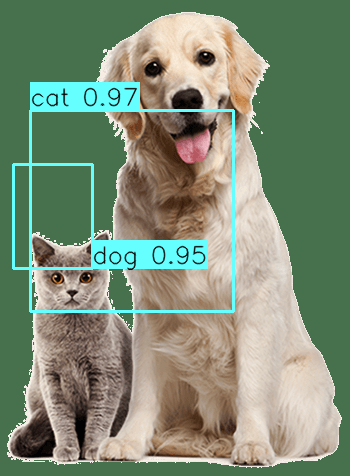

In [47]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()